In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare, pearsonr,chi2_contingency, f_oneway,tukey_hsd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings("ignore")


In [21]:
# importer le json en df
df = pd.read_json('jpbox_fulldata.json')


# Mettre les dates au bon format

df['date']=df['date'].str.strip()
df['date']=df['date'].str.replace('/','-')
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y",errors="coerce")

# # Conversion des durée en timedelta(Erreur avec 40 films)

df["duration"] = df["duration"].str.replace(r'h', ' hours', regex=True)  # Remplacer 'h' par 'hours'
df["duration"] = df["duration"].str.replace(r'min', ' minutes', regex=True)  # Remplacer 'min' par 'minutes'
df["duration"] = pd.to_timedelta(df["duration"], errors='coerce')
df["duration_minutes"] = pd.to_timedelta(df["duration"], errors='coerce').dt.total_seconds() / 60
df['released_year'] = df['released_year'].astype(str)

# Mise en forme des budgets
df['budget'] = (
    df['budget']
    .astype(str)
    .str.replace(r'[^\d]', '', regex=True)
    .replace('', pd.NA)  # Remplace les chaînes vides par NaN
    .astype('Int64')     # Type entier nullable de pandas
)

# Mise en forme des incomes_frances
df['incomes_france'] = (
    df['incomes_france']
    .astype(str)
    .str.replace(r'[^\d]', '', regex=True)
    .replace('', pd.NA)  # Remplace les chaînes vides par NaN
    .astype('Int64')     # Type entier nullable de pandas
)

# Mise en forme des incomes_total
df['incomes_total'] = (
    df['incomes_total']
    .astype(str)
    .str.replace(r'[^\d]', '', regex=True)
    .replace('', pd.NA)  # Remplace les chaînes vides par NaN
    .astype('Int64')     # Type entier nullable de pandas
)




# print(len(df))
print(len(df))
df.dtypes

9626


url_movie                    object
fr_title                     object
original_title               object
country                      object
category                     object
released_year                object
date                 datetime64[ns]
classification               object
duration            timedelta64[ns]
total_entrances               int64
weekly_entrances              int64
budget                        Int64
incomes_total                 Int64
incomes_france                Int64
synopsis                     object
directors                    object
actors                       object
producers                    object
compositors                  object
authors                      object
duration_minutes            float64
dtype: object

In [15]:
print(df['budget'].isna().sum())
print(df['incomes_france'].isna().sum())
print(df['incomes_total'].isna().sum())

3822
3435
1400


                  duration_minutes  total_entrances    budget  incomes_total  \
duration_minutes          1.000000         0.234757  0.409149       0.348490   
total_entrances           0.234757         1.000000  0.474708       0.671942   
budget                    0.409149         0.474708  1.000000       0.769840   
incomes_total             0.348490         0.671942  0.769840       1.000000   
incomes_france            0.242013         0.974003  0.504569       0.702935   
weekly_entrances          0.277345         0.900787  0.567017       0.726437   

                  incomes_france  weekly_entrances  
duration_minutes        0.242013          0.277345  
total_entrances         0.974003          0.900787  
budget                  0.504569          0.567017  
incomes_total           0.702935          0.726437  
incomes_france          1.000000          0.891470  
weekly_entrances        0.891470          1.000000  


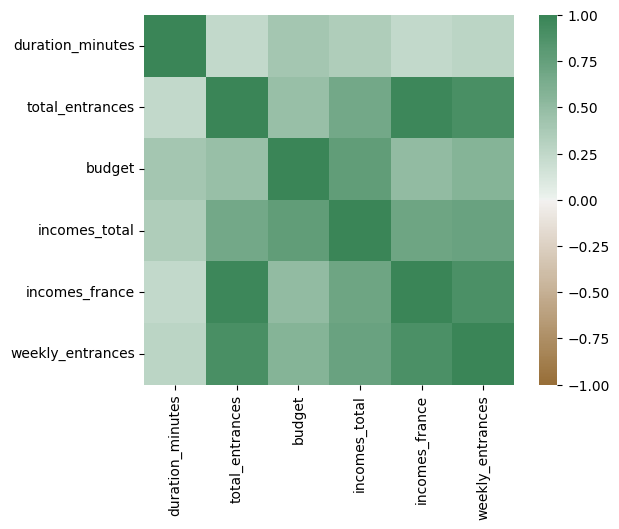

In [22]:
# df pour la heatmap
df_pearson = df.copy()
df_pearson = df.dropna()[['duration_minutes', 'total_entrances','budget','incomes_total','incomes_france', 'weekly_entrances']]
corr_df_pearon = df_pearson.corr()
print (corr_df_pearon)

axis_corr = sns.heatmap(
corr_df_pearon,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

plt.show()

In [18]:
df.columns

Index(['url_movie', 'fr_title', 'original_title', 'country', 'category',
       'released_year', 'date', 'classification', 'duration',
       'total_entrances', 'weekly_entrances', 'budget', 'incomes_total',
       'incomes_france', 'synopsis', 'directors', 'actors', 'producers',
       'compositors', 'authors', 'duration_minutes'],
      dtype='object')

In [23]:

# Exemple de dataframe df_2_anova
df_2_anova = df[['country', 'category', 'released_year', 'date', 'classification', 'weekly_entrances','directors',
                 'actors','producers','authors'
        ]]

# Boucle sur les colonnes discrètes
for column in df_2_anova.columns:
    if column != 'weekly_entrances':  # On ne veut pas tester 'weekly_entrances' avec lui-même
        # Créer les groupes selon les valeurs de la colonne discrète
        groups = [df_2_anova[df_2_anova[column] == category]['weekly_entrances']
                  for category in df_2_anova[column].dropna().unique()]
        
        # Appliquer le test ANOVA
        stat_anova, p_value = f_oneway(*groups)
        
        # # Si l'ANOVA est significative (p-value < 0.05), on applique Tukey HSD
        # if p_value < 0.05:
        #     # Appliquer le test post-hoc Tukey
        #     tukey_result = pairwise_tukeyhsd(df_2_anova['weekly_entrances'], df_2_anova[column])
        #     print(f'Post-hoc Tukey HSD pour {column}:\n', tukey_result.summary())
        
        # Afficher les résultats de l'ANOVA
        print(len(df))
        print(f'Le résultat pour {column}')
        print("Statistique F:", stat_anova)
        print("P-value:", p_value)
        print('')
        print('================================================================================')


9626
Le résultat pour country
Statistique F: 8.869680396375651
P-value: 1.2576272491169478e-91

9626
Le résultat pour category
Statistique F: 90.23108053436367
P-value: 0.0

9626
Le résultat pour released_year
Statistique F: 3.4241764266316252
P-value: 5.25784645842884e-15

9626
Le résultat pour date
Statistique F: 1.0574101935337237
P-value: 0.06487058204286972

9626
Le résultat pour classification
Statistique F: 12.166626315863729
P-value: 8.915962415407107e-12



TypeError: unhashable type: 'list'

### Les variables explicatives

## 1. ANOVA

Avec le test de l'ANOVA on remarquer que les variables explicatives ont :

- le réalisateur
- le pays 
- la catégorie
- l'année de sortie
- le pegi

# 2. Corrélation de pearson

il y a une vrai variale qui peut explicative et , qui est la durée du film l'autre est une fuite de données pour un modele qui prédit la premiere semaine d'entrées

# 3. analyse approfondie 

pour le test de l'Anova les tests post-hoc étant une comparaison entre chaque catégories, il y a beaucoup de categories ce qui les tableaux trop volumineux pour etre comparer



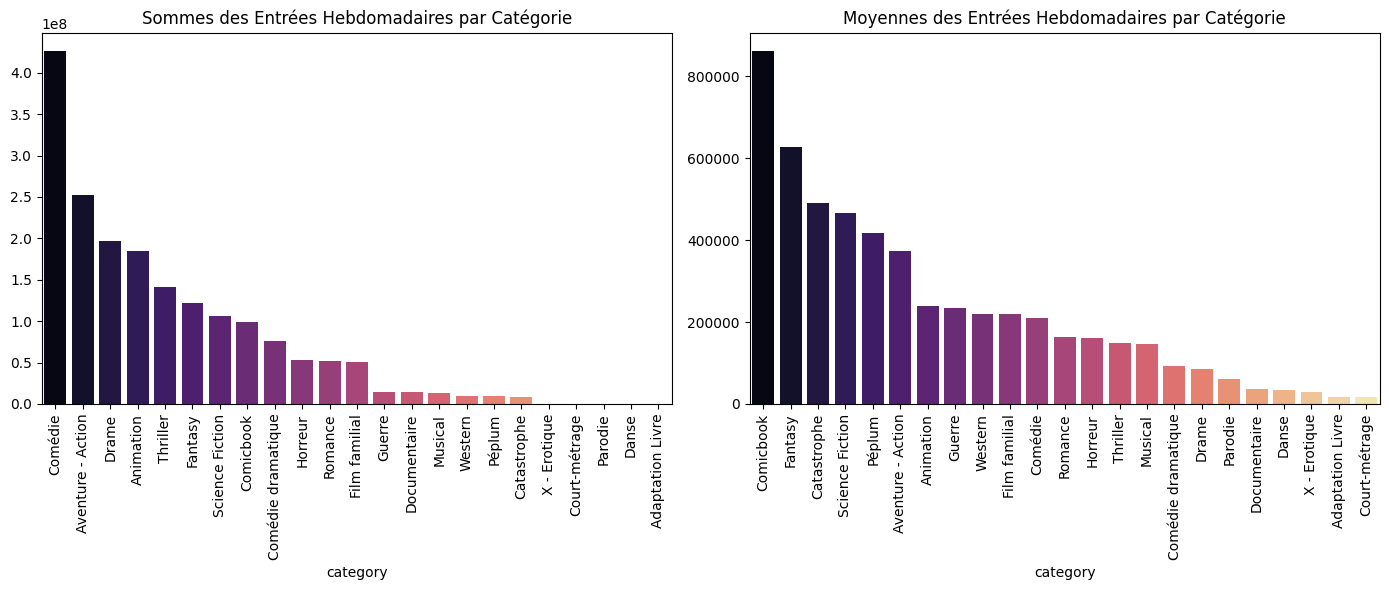

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


df_we_sum = df.groupby('category')['weekly_entrances'].sum().sort_values(ascending=False)

df_we_mean = df.groupby('category')['weekly_entrances'].mean().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=df_we_sum.index, y=df_we_sum.values, palette='magma', ax=axes[0])
axes[0].set_title('Sommes des Entrées Hebdomadaires par Catégorie')
axes[0].set_xticklabels(df_we_sum.index, rotation=90)


sns.barplot(x=df_we_mean.index, y=df_we_mean.values, palette='magma', ax=axes[1])
axes[1].set_title('Moyennes des Entrées Hebdomadaires par Catégorie')
axes[1].set_xticklabels(df_we_mean.index, rotation=90)
plt.tight_layout()
plt.show()


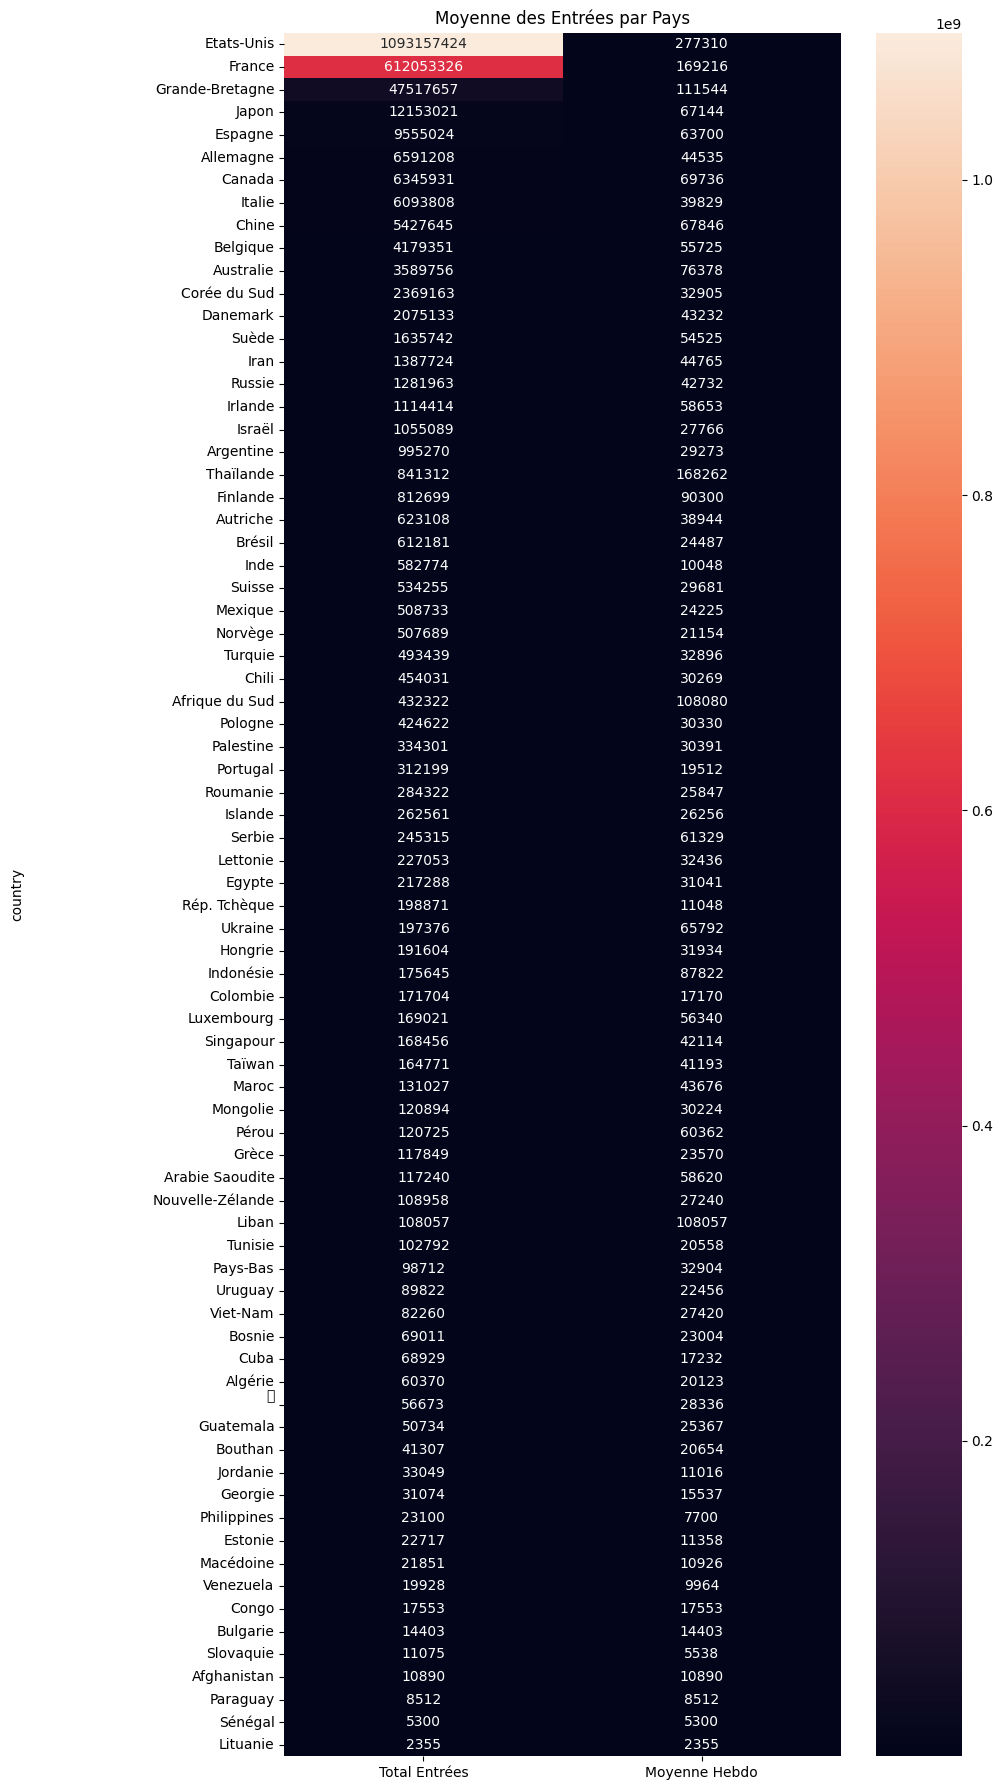

In [25]:
# un tableau est plus pertinent dans ce cas

df_we_country_sum = df.groupby('country')['weekly_entrances'].sum().sort_values(ascending=False)

df_we_country_mean = df.groupby('country')['weekly_entrances'].mean().sort_values(ascending=False)

df_country_stats = pd.concat(
    [df_we_country_sum, df_we_country_mean],
    axis=1,
    keys=['Total Entrées', 'Moyenne Hebdo']
)

plt.figure(figsize=(10, 18))
sns.heatmap(df_country_stats.sort_values('Total Entrées', ascending=False), annot=True, fmt=".0f")
plt.title('Moyenne des Entrées par Pays')
plt.tight_layout()
plt.show()

### attention la palette ne respecte pas l'échelle

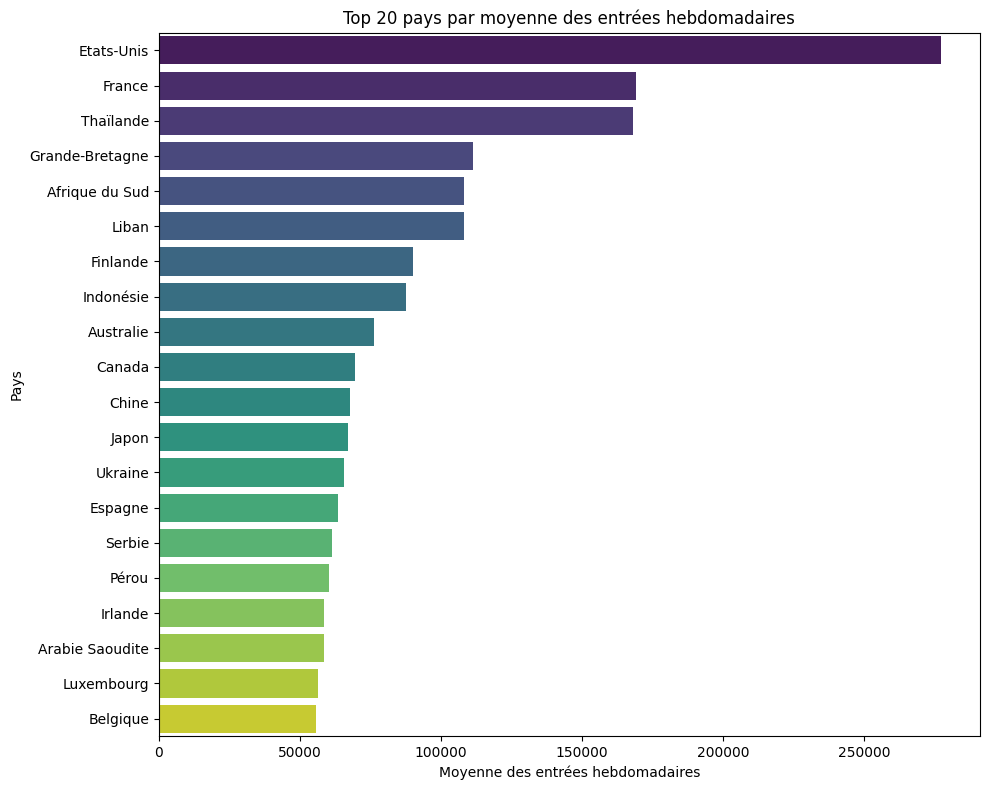

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# On prend les 20 pays avec les meilleures moyennes
top_n = 20
df_top_mean = df_we_country_mean.head(top_n)

# Tracer un bar chart horizontal
plt.figure(figsize=(10, 8))
sns.barplot(x=df_top_mean.values, y=df_top_mean.index, palette="viridis")
plt.title(f'Top {top_n} pays par moyenne des entrées hebdomadaires')
plt.xlabel('Moyenne des entrées hebdomadaires')
plt.ylabel('Pays')
plt.tight_layout()
plt.show()


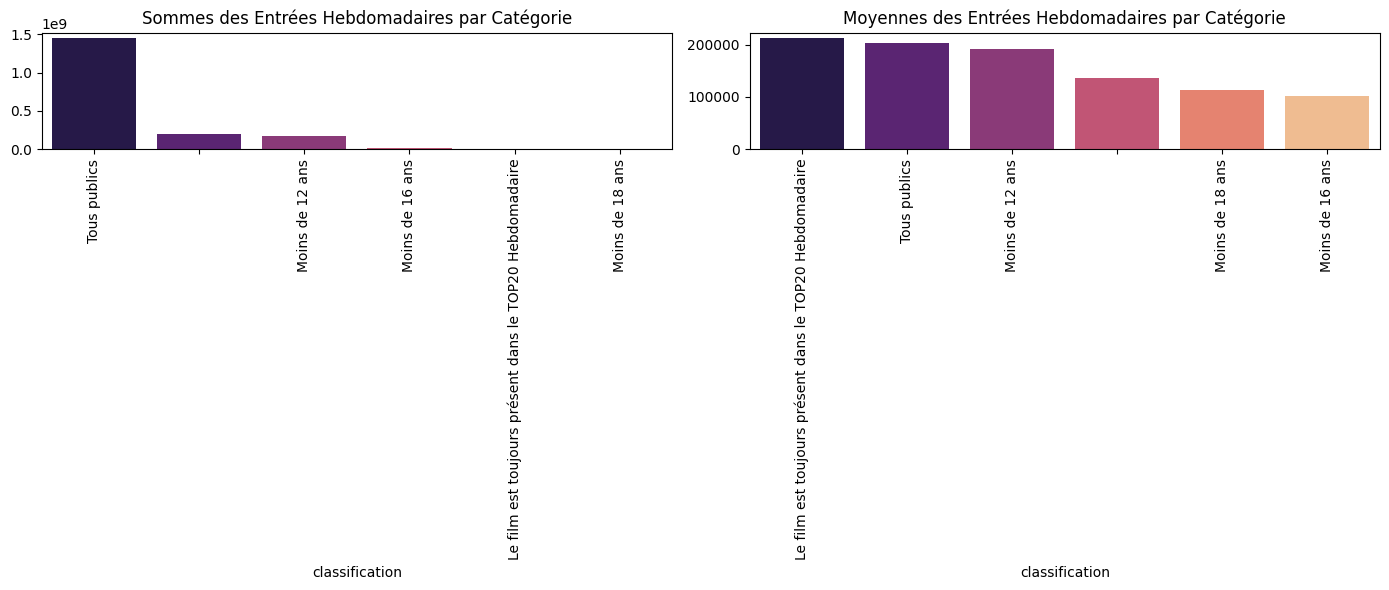

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


df_we_classification_sum = df.groupby('classification')['weekly_entrances'].sum().sort_values(ascending=False)

df_we_classification_mean = df.groupby('classification')['weekly_entrances'].mean().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=df_we_classification_sum.index, y=df_we_classification_sum.values, palette='magma', ax=axes[0])
axes[0].set_title('Sommes des Entrées Hebdomadaires par Catégorie')
axes[0].set_xticklabels(df_we_classification_sum.index, rotation=90)


sns.barplot(x=df_we_classification_mean.index, y=df_we_classification_mean.values, palette='magma', ax=axes[1])
axes[1].set_title('Moyennes des Entrées Hebdomadaires par Catégorie')
axes[1].set_xticklabels(df_we_classification_mean.index, rotation=90)
plt.tight_layout()
plt.show()

In [25]:
df.groupby('PEGI')['PEGI'].count()

PEGI
                                                           1522
Le film est toujours présent dans le TOP20 Hebdomadaire      12
Moins de 12 ans                                             886
Moins de 16 ans                                             153
Moins de 18 ans                                               7
Tous publics                                               7391
Name: PEGI, dtype: int64

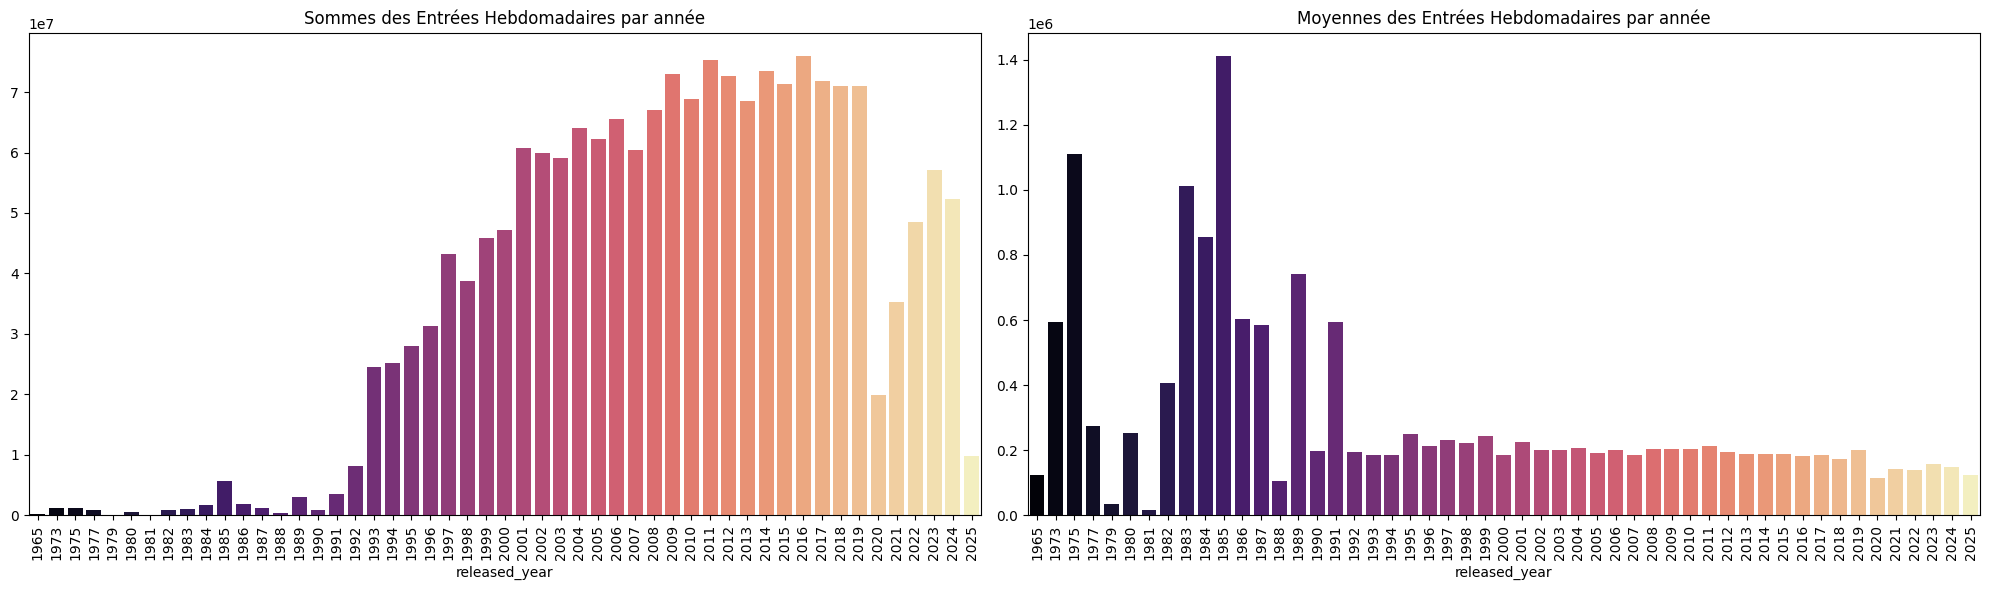

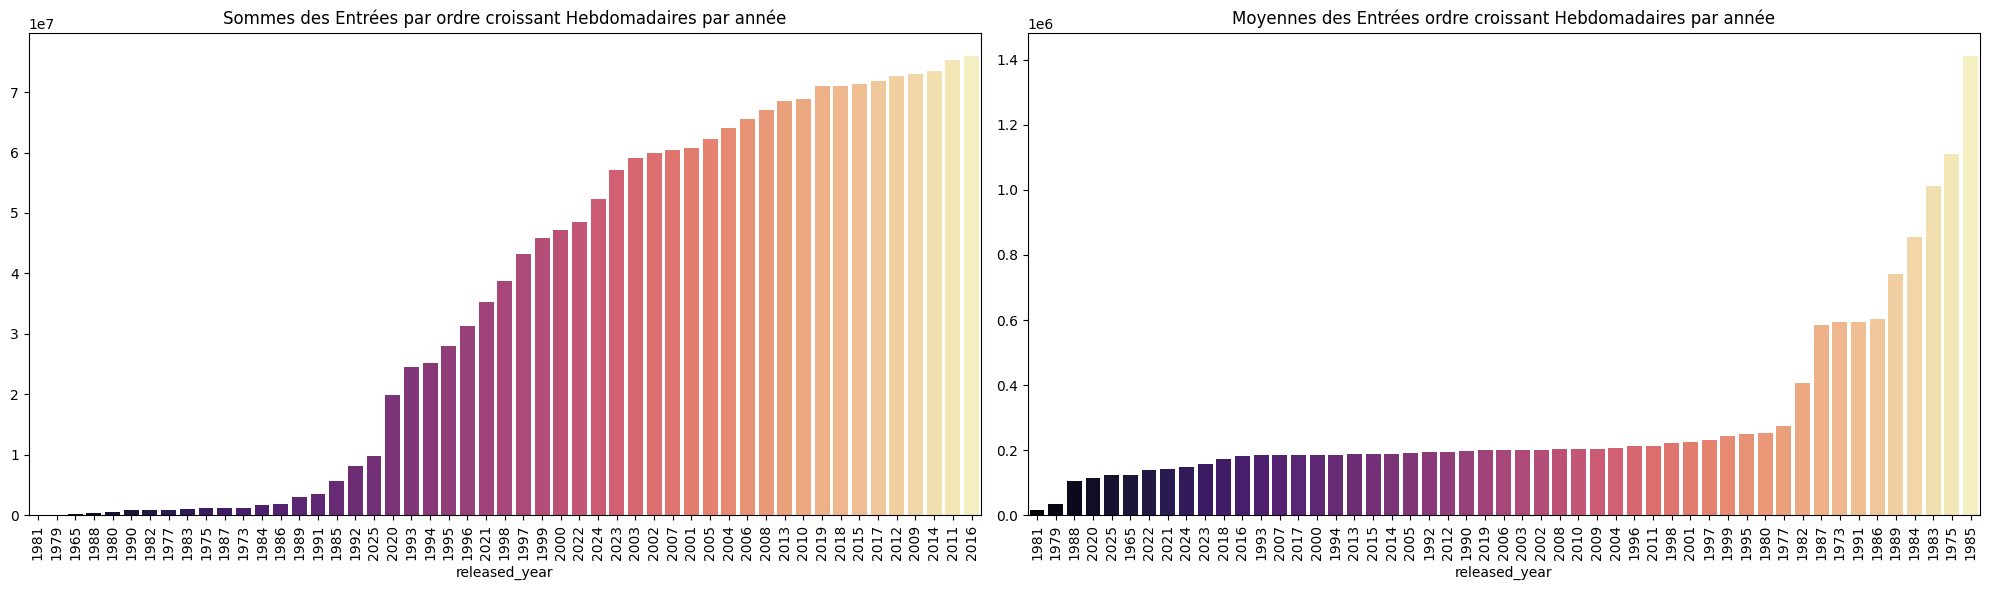

In [30]:
df_we_years_sum = df.groupby('released_year')['weekly_entrances'].sum()
df_we_years_mean = df.groupby('released_year')['weekly_entrances'].mean()

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.barplot(x=df_we_years_sum.index, y=df_we_years_sum.values, palette='magma', ax=axes[0])
axes[0].set_title('Sommes des Entrées Hebdomadaires par année')
axes[0].set_xticklabels(df_we_years_sum.index, rotation=90)


sns.barplot(x=df_we_years_mean.index, y=df_we_years_mean.values, palette='magma', ax=axes[1])
axes[1].set_title('Moyennes des Entrées Hebdomadaires par année')
axes[1].set_xticklabels(df_we_years_mean.index, rotation=90)
plt.tight_layout()
plt.show()

df_we_years_sum_ORDER = df.groupby('released_year')['weekly_entrances'].sum().sort_values()
df_we_years_mean_ORDER = df.groupby('released_year')['weekly_entrances'].mean().sort_values()

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.barplot(x=df_we_years_sum_ORDER.index, y=df_we_years_sum_ORDER.values, palette='magma', ax=axes[0])
axes[0].set_title('Sommes des Entrées par ordre croissant Hebdomadaires par année')
axes[0].set_xticklabels(df_we_years_sum_ORDER.index, rotation=90)


print('='*550)

sns.barplot(x=df_we_years_mean_ORDER.index, y=df_we_years_mean_ORDER.values, palette='magma', ax=axes[1])
axes[1].set_title('Moyennes des Entrées ordre croissant Hebdomadaires par année')
axes[1].set_xticklabels(df_we_years_mean_ORDER.index, rotation=90)
plt.tight_layout()
plt.show()




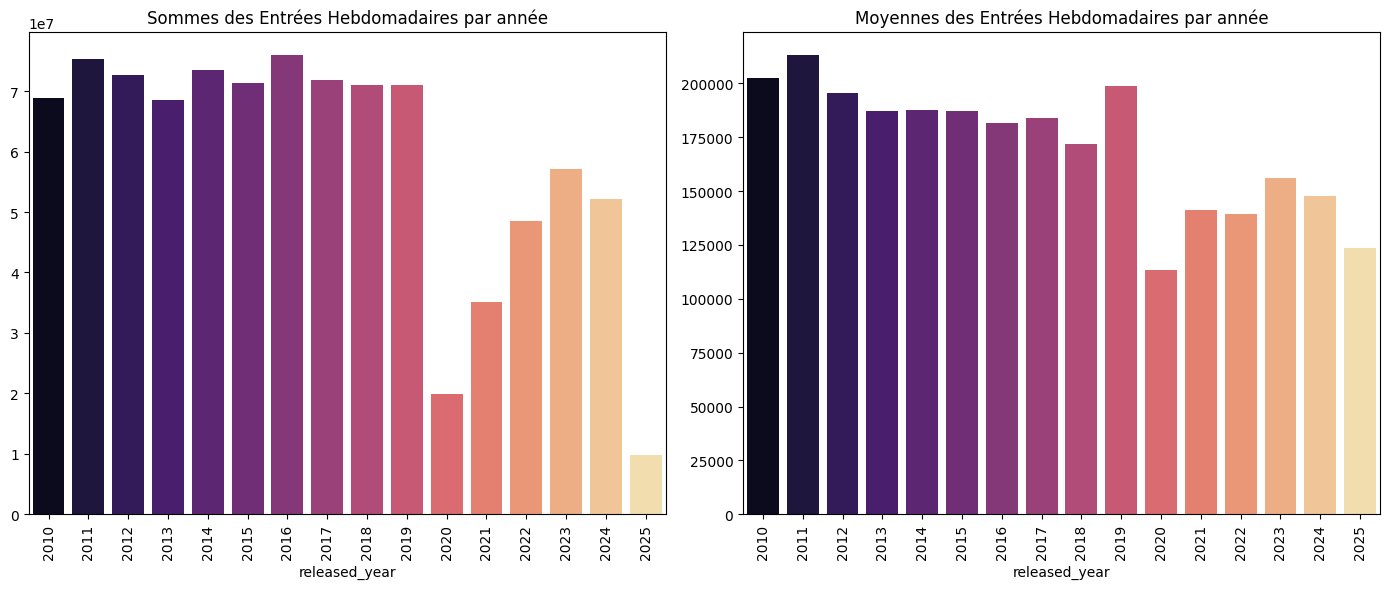

In [31]:

#AFFLUENCE PAR ANNEE À PARTIR DE 2010

df_year_2010 = df[['released_year','weekly_entrances']][pd.to_numeric(df['released_year']) > 2009]
# df_year_2010

df_we_years_sum = df_year_2010.groupby('released_year')['weekly_entrances'].sum()
df_we_years_mean = df_year_2010.groupby('released_year')['weekly_entrances'].mean()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=df_we_years_sum.index, y=df_we_years_sum.values, palette='magma', ax=axes[0])
axes[0].set_title('Sommes des Entrées Hebdomadaires par année')
axes[0].set_xticklabels(df_we_years_sum.index, rotation=90)


sns.barplot(x=df_we_years_mean.index, y=df_we_years_mean.values, palette='magma', ax=axes[1])
axes[1].set_title('Moyennes des Entrées Hebdomadaires par année')
axes[1].set_xticklabels(df_we_years_mean.index, rotation=90)
plt.tight_layout()
plt.show()


In [46]:
df.columns

Index(['fr_title', 'original_title', 'country', 'category', 'released_year',
       'date', 'PEGI', 'duration', 'total_entrances', 'weekly_entrances',
       'name', 'budget', 'income_boxoffice', 'profit', 'profitability',
       'duration_minutes'],
      dtype='object')

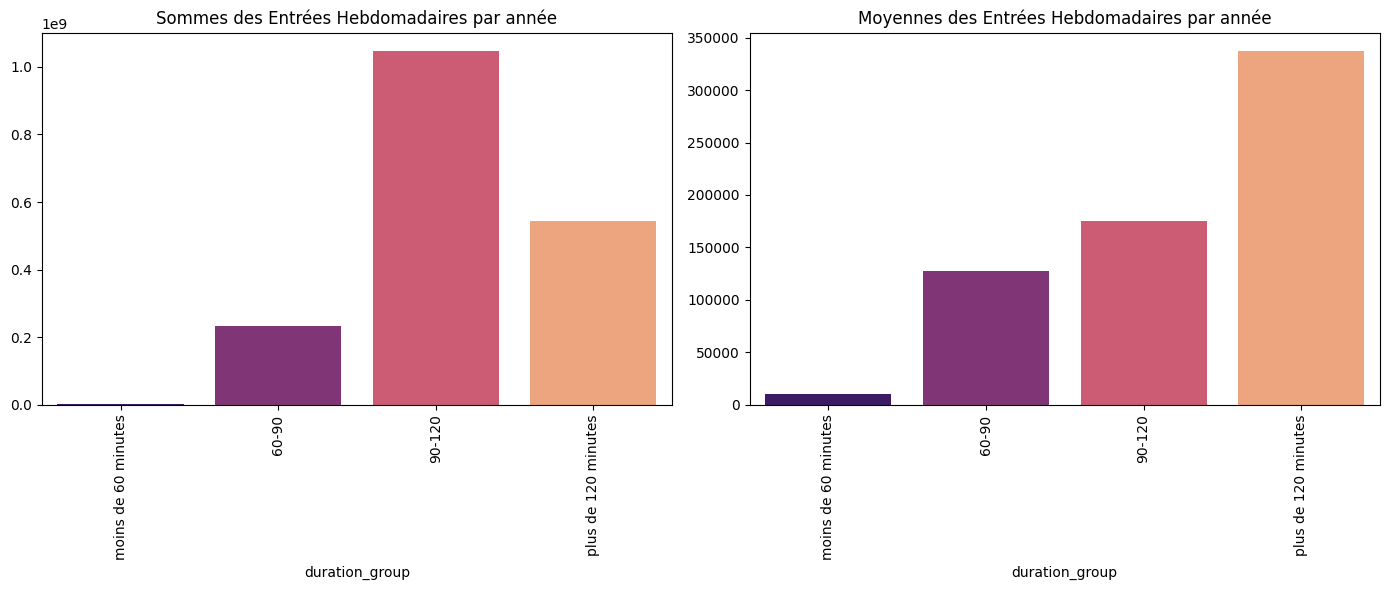

In [32]:
bins_duration = [0,60,90,120,df ['duration_minutes'].max()]
bins_duration_label = ['moins de 60 minutes','60-90','90-120','plus de 120 minutes']
df_duration = df[['duration_minutes','weekly_entrances']]

df_duration['duration_group'] = pd.cut(df_duration['duration_minutes'],bins_duration,labels = bins_duration_label)

df_duration_sum = df_duration.groupby('duration_group')['weekly_entrances'].sum()
df_duration_mean = df_duration.groupby('duration_group')['weekly_entrances'].mean()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=df_duration_sum.index, y=df_duration_sum.values, palette='magma', ax=axes[0])
axes[0].set_title('Sommes des Entrées Hebdomadaires par année')
axes[0].set_xticklabels(df_duration_sum.index, rotation=90)


sns.barplot(x=df_duration_mean.index, y=df_duration_mean.values, palette='magma', ax=axes[1])
axes[1].set_title('Moyennes des Entrées Hebdomadaires par année')
axes[1].set_xticklabels(df_duration_mean.index, rotation=90)
plt.tight_layout()
plt.show()



In [33]:
#  répartition des film par la catégorie de durée

df_duration = df.copy()

df_duration['duration_group'] = pd.cut(df_duration['duration_minutes'],bins_duration,labels = bins_duration_label)

df_duration.groupby('duration_group')['original_title'].count()

duration_group
moins de 60 minutes     172
60-90                  1831
90-120                 5968
plus de 120 minutes    1610
Name: original_title, dtype: int64

In [50]:
df.columns

Index(['fr_title', 'original_title', 'country', 'category', 'released_year',
       'date', 'PEGI', 'duration', 'total_entrances', 'weekly_entrances',
       'name', 'budget', 'income_boxoffice', 'profit', 'profitability',
       'duration_minutes'],
      dtype='object')

In [34]:
df[df.budget.isna() == True]

,url_movie,fr_title,original_title,country,category,released_year,date,classification,duration,total_entrances,...,budget,incomes_total,incomes_france,synopsis,directors,actors,producers,compositors,authors,duration_minutes
132,https://www.jpbox-office.com/fichfilm.php?id=1...,Astérix - Le Secret de la Potion Magique,Astérix - Le Secret de la Potion Magique,France,Animation,2018,2018-12-05,Tous publics,0 days 01:23:00,3923364,...,<NA>,46903854,31546346,À la suite d’une chute lors de la cueillette d...,[],[Christian Clavier],[],[],[René Goscinny],83.0
154,https://www.jpbox-office.com/fichfilm.php?id=2...,3 jours max,3 jours max,France,Comédie,2023,2023-10-25,Tous publics,0 days 01:29:00,1898935,...,<NA>,<NA>,<NA>,"Rayane, policier maladroit, se trouve cette fo...",[],"[Philippe Lacheau, José Garcia, Franck Gastamb...",[],[],[],89.0
196,https://www.jpbox-office.com/fichfilm.php?id=2...,Les Trois Mousquetaires: Milady,Les Trois Mousquetaires: Milady,France,Aventure - Action,2023,2023-12-13,Tous publics,0 days 01:55:00,2576308,...,<NA>,<NA>,<NA>,"Du Louvre au Palais de Buckingham, des bas-fon...",[],"[Vincent Cassel, François Civil, Romain Duris,...",[],[],[Alexandre Dumas],115.0
253,https://www.jpbox-office.com/fichfilm.php?id=2...,Adieu Les Cons,Adieu Les Cons,France,Comédie,2020,2020-10-21,Tous publics,0 days 01:27:00,1993197,...,<NA>,16037301,15843504,Lorsque Suze Trappet apprend à 43 ans qu’elle ...,[Albert Dupontel],"[Albert Dupontel, Virginie Efira]",[],[],[],87.0
275,https://www.jpbox-office.com/fichfilm.php?id=2...,Novembre,Novembre,France,Thriller,2022,2022-10-05,Tous publics,0 days 01:40:00,2393484,...,<NA>,17605170,17605170,Une plongée au cœur de l’Anti-Terrorisme penda...,[Cédric Jimenez],"[Jean Dujardin, Sandrine Kiberlain, Jérémy Ren...",[],[],[],100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,https://www.jpbox-office.com/fichfilm.php?id=2...,Belphégor - Le fantôme du Louvre,Belphégor - Le fantôme du Louvre,France,Thriller,2001,2001-04-04,Tous publics,0 days 01:37:00,2032144,...,<NA>,<NA>,<NA>,"Paris, an 2000. Faisant de la pyramide du Louv...",[Jean-Paul Salomé],"[Sophie Marceau, Frédéric Diefenthal, Michel S...",[],[],[Danièle Thompson],97.0
9378,https://www.jpbox-office.com/fichfilm.php?id=2...,Vidocq,Vidocq,France,Aventure - Action,2001,2001-09-19,Tous publics,0 days 01:40:00,1881086,...,<NA>,<NA>,<NA>,Juillet 1830 : Paris gronde des clameurs de la...,[],"[Gérard Depardieu, André Dussollier, Guillaume...",[],[],[],100.0
9390,https://www.jpbox-office.com/fichfilm.php?id=4...,Germinal,Germinal,France,Drame,1993,1993-09-29,,0 days 02:40:00,6161776,...,<NA>,<NA>,<NA>,None,[Claude Berri],"[Gérard Depardieu, Miou-Miou, Yolande Moreau]",[Claude Berri],[],[Emile Zola],160.0
9394,https://www.jpbox-office.com/fichfilm.php?id=6...,Hold up,Hold up,France,Comédie,1985,1985-10-23,,0 days 01:54:00,2367294,...,<NA>,<NA>,<NA>,None,[Alexandre Arcady],"[Jean-Paul Belmondo, Jacques Villeret]",[],[],[],114.0


In [55]:
df_entrances.isna().sum()

fr_title            0
original_title      0
country             0
category            0
released_year       0
date                0
PEGI                0
duration            0
total_entrances     0
weekly_entrances    0
dtype: int64